In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('../Data/scores.csv')

# Replace -- with NaN
df = df.replace('--', np.nan)

# Filter out All-Age corps
df = df[df['Class'] != 'All-Age']

print(df.describe())
print(df.info())

            Total        CTot     GE1_Rep    GE1_Perf     GE1_Tot     GE2_Rep  \
count  542.000000  542.000000  542.000000  542.000000  542.000000  542.000000   
mean    77.243173   77.242260    7.799908    7.650923   15.450830    7.849539   
std     10.409718   10.411865    1.001415    1.077106    2.070208    1.013465   
min     45.800000   45.800000    4.500000    4.400000    8.900000    4.700000   
25%     70.462500   70.462500    7.125000    7.000000   14.100000    7.200000   
50%     77.425000   77.425000    7.800000    7.700000   15.550000    7.900000   
75%     84.928500   84.928500    8.500000    8.487500   16.937500    8.600000   
max     98.750000   98.750000    9.900000    9.900000   19.800000    9.900000   

         GE2_Perf     GE2_Tot      GE_Tot     VP_Cont  ...     MB_Achv  \
count  542.000000  542.000000  542.000000  542.000000  ...  542.000000   
mean     7.645203   15.494742   30.959041    7.815129  ...    7.580812   
std      1.085161    2.094486    4.146588    0.9

In [165]:
# Adding the descriptive stats to its own dataframe
desc_stats = df.describe()
desc_stats.to_csv('../Data/descriptive_stats.csv')

desc_stats.head()

,Total,CTot,GE1_Rep,GE1_Perf,GE1_Tot,GE2_Rep,GE2_Perf,GE2_Tot,GE_Tot,VP_Cont,...,MB_Achv,MB_Tot,MA_Cont,MA_Achv,MA_Tot,MP_Cont,MP_Achv,MP_Tot,Mus_Tot,Penalties
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,77.243173,77.242260,7.799908,7.650923,15.450830,7.849539,7.645203,15.494742,30.959041,7.815129,...,7.580812,15.371402,7.840406,7.605074,15.445480,7.895018,7.666790,15.561808,23.181375,-0.007380
std,10.409718,10.411865,1.001415,1.077106,2.070208,1.013465,1.085161,2.094486,4.146588,0.995959,...,1.101784,2.150427,1.051164,1.106662,2.152861,1.055486,1.114571,2.165461,3.171661,0.171815
min,45.800000,45.800000,4.500000,4.400000,8.900000,4.700000,4.300000,9.100000,18.000000,4.600000,...,4.300000,8.900000,4.500000,4.300000,8.800000,4.900000,4.500000,9.400000,13.650000,-4.000000
25%,70.462500,70.462500,7.125000,7.000000,14.100000,7.200000,7.000000,14.200000,28.400000,7.200000,...,6.825000,14.025000,7.100000,6.800000,13.800000,7.200000,7.000000,14.100000,21.050000,0.000000


# Correlation Matrix of Score Columns

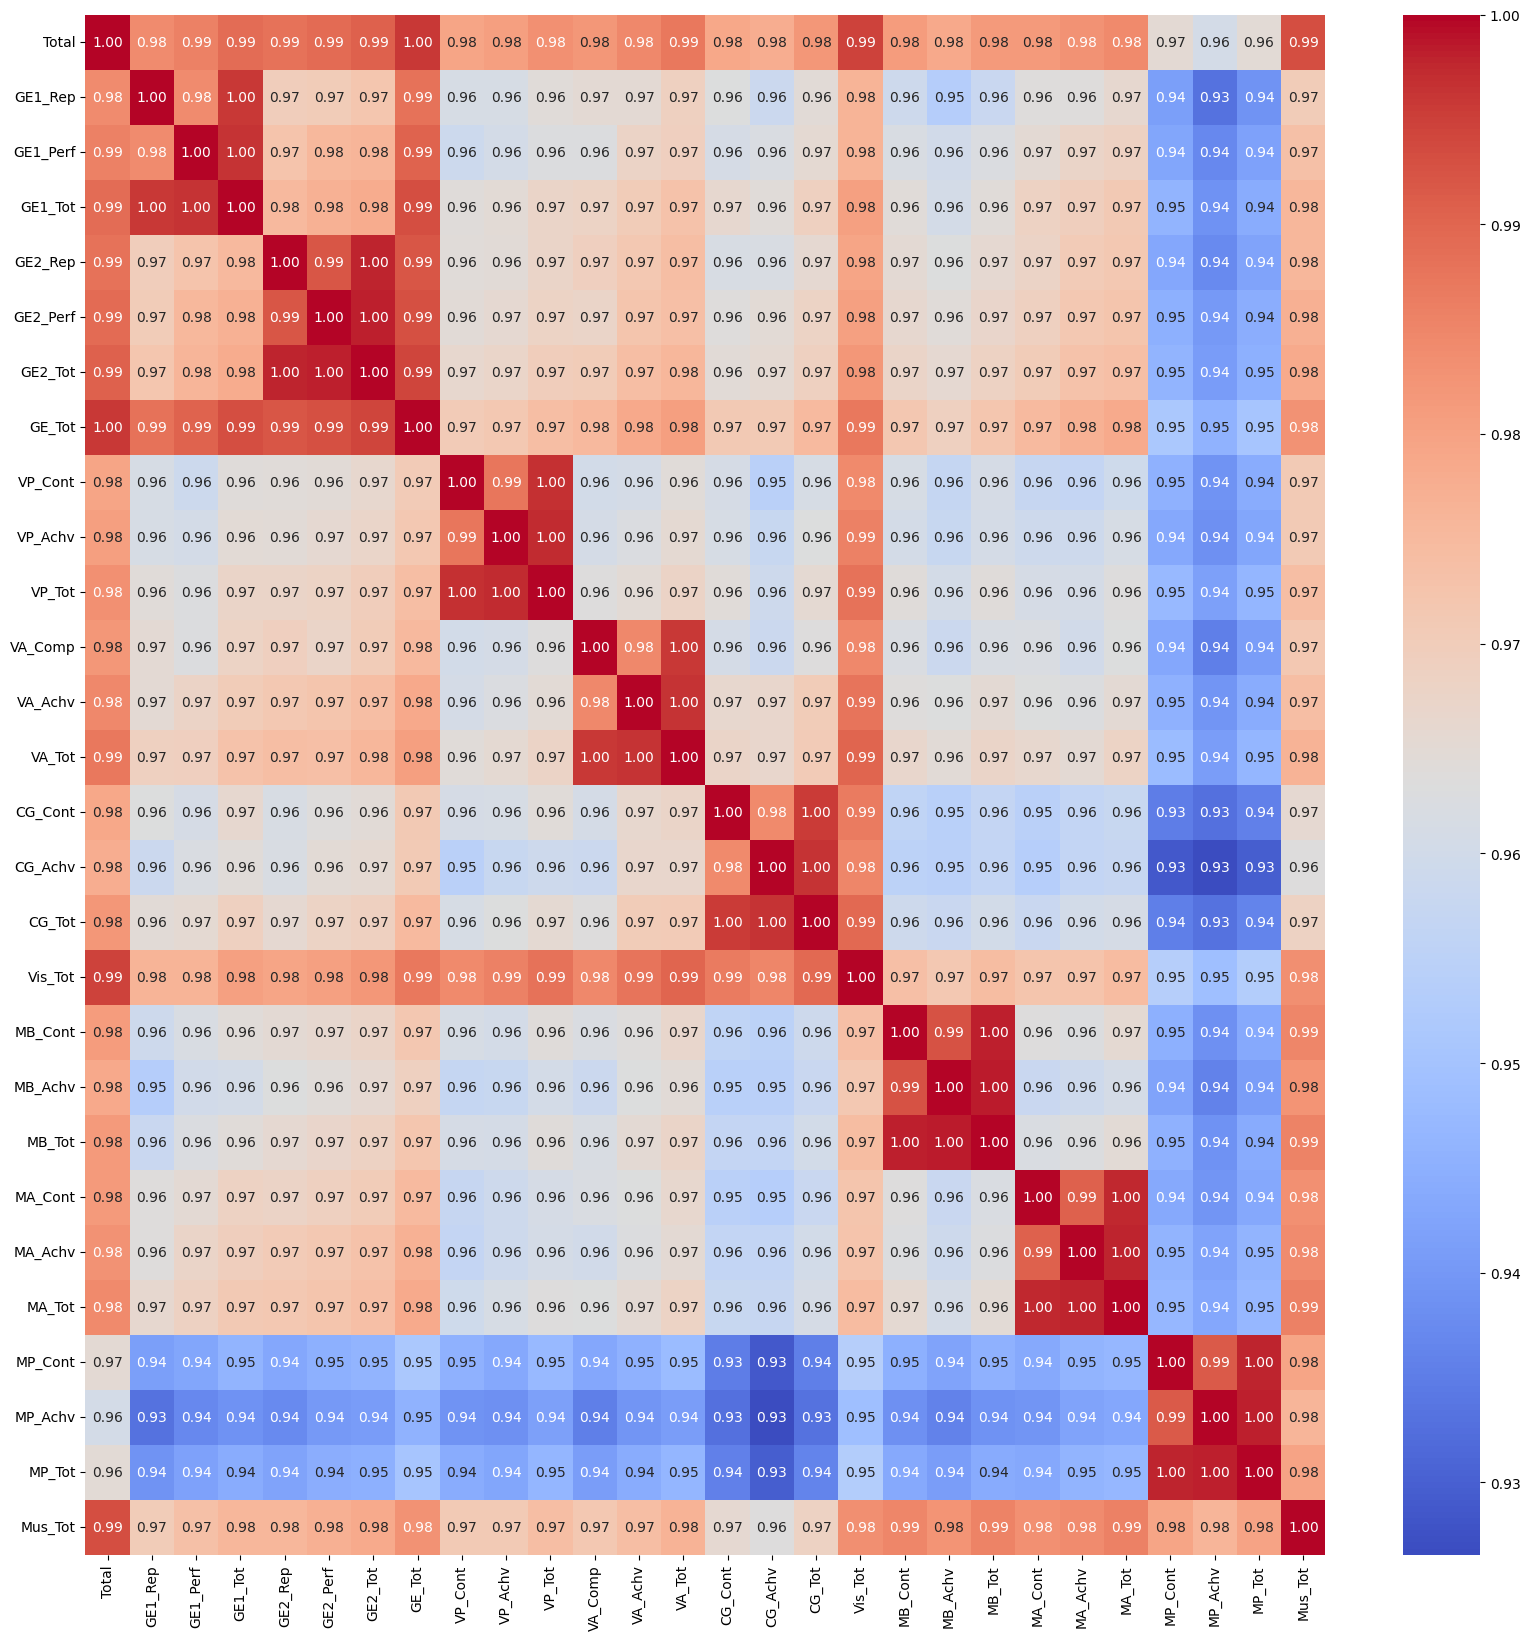

In [166]:
# Gathering all numerical columns
corrCol = ['Total', 'GE1_Rep', 'GE1_Perf', 'GE1_Tot', 'GE2_Rep', 'GE2_Perf', 'GE2_Tot', 'GE_Tot', 'VP_Cont', 'VP_Achv', 'VP_Tot', 'VA_Comp', 'VA_Achv', 'VA_Tot', 'CG_Cont', 'CG_Achv', 'CG_Tot', 'Vis_Tot', 'MB_Cont', 'MB_Achv', 'MB_Tot', 'MA_Cont', 'MA_Achv', 'MA_Tot', 'MP_Cont', 'MP_Achv', 'MP_Tot', 'Mus_Tot']

dfCorr = df[corrCol]

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(dfCorr.corr(), annot=True, fmt='.2f', cmap='coolwarm')

plt.savefig('../Plots/CorrelationMatrix.png', dpi=300, bbox_inches='tight')

plt.show()

In [167]:
# Displaying descriptive stats for only MP_Cont, MP_Achv, MP_Tot
print(df[['MP_Cont', 'MP_Achv', 'MP_Tot']].describe())

          MP_Cont     MP_Achv      MP_Tot
count  542.000000  542.000000  542.000000
mean     7.895018    7.666790   15.561808
std      1.055486    1.114571    2.165461
min      4.900000    4.500000    9.400000
25%      7.200000    7.000000   14.100000
50%      7.900000    7.700000   15.600000
75%      8.700000    8.500000   17.200000
max      9.900000    9.850000   19.750000


# Comparing Descriptive Stats

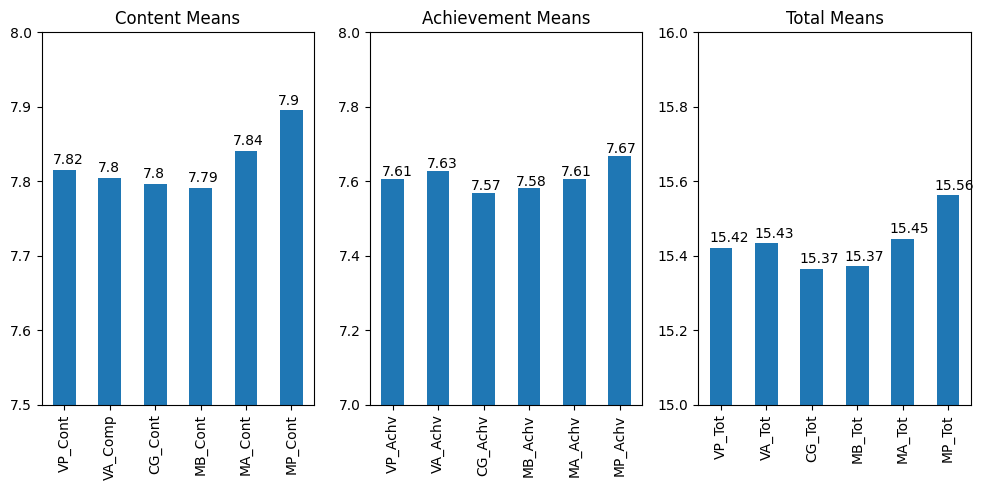

In [168]:
# Adding similar columns to a list
contCol = ['VP_Cont', 'VA_Comp', 'CG_Cont', 'MB_Cont', 'MA_Cont', 'MP_Cont']
achvCol = ['VP_Achv', 'VA_Achv', 'CG_Achv', 'MB_Achv', 'MA_Achv', 'MP_Achv']
totCol = ['VP_Tot', 'VA_Tot', 'CG_Tot', 'MB_Tot', 'MA_Tot', 'MP_Tot']

# Finding the mean of the columns
cont_mean = df[contCol].mean()
achv_mean = df[achvCol].mean()
tot_mean = df[totCol].mean()

# Plottiing the means of the columns using a bar plot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

cont_mean.plot(kind='bar', ax=ax[0])
achv_mean.plot(kind='bar', ax=ax[1])
tot_mean.plot(kind='bar', ax=ax[2])

# Set the y-axis limits for the plots
ax[0].set_ylim([7.5, 8])
ax[1].set_ylim([7, 8])
ax[2].set_ylim([15, 16])

# Adding values to the bars
for i in range(3):
    for p in ax[i].patches:
        ax[i].annotate(str(round(p.get_height(), 2)), (p.get_x() * .99, p.get_height() * 1.001))

# Adding titles to the plots
ax[0].set_title('Content Means')
ax[1].set_title('Achievement Means')
ax[2].set_title('Total Means')

plt.tight_layout()

plt.savefig('../Plots/Means.png', dpi=300, bbox_inches='tight')

plt.show()

In [169]:
# Performing an ANOVA test on the Cont, Achv, and Tot columns
from scipy.stats import f_oneway

# ANOVA test for Content
f_val, p_val = f_oneway(df['VP_Cont'], df['VA_Comp'], df['CG_Cont'], df['MB_Cont'], df['MA_Cont'], df['MP_Cont'])
print(f'ANOVA test for Content: F-value = {f_val}, P-value = {p_val}')

# ANOVA test for Achievement
f_val, p_val = f_oneway(df['VP_Achv'], df['VA_Achv'], df['CG_Achv'], df['MB_Achv'], df['MA_Achv'], df['MP_Achv'])
print(f'ANOVA test for Achievement: F-value = {f_val}, P-value = {p_val}')

# ANOVA test for Total
f_val, p_val = f_oneway(df['VP_Tot'], df['VA_Tot'], df['CG_Tot'], df['MB_Tot'], df['MA_Tot'], df['MP_Tot'])
print(f'ANOVA test for Total: F-value = {f_val}, P-value = {p_val}')

ANOVA test for Content: F-value = 0.7766216816152612, P-value = 0.5664424738144958
ANOVA test for Achievement: F-value = 0.5393703927105752, P-value = 0.7465806478309788
ANOVA test for Total: F-value = 0.5995213796886008, P-value = 0.7003546566691863


In [170]:
# Performing a Tukey's HSD test on the Content, Achievement, and Total columns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test for Content
cont_data = pd.melt(df[contCol])
cont_data.columns = ['Category', 'Value']
cont_data['Category'] = cont_data['Category'].astype('category')
cont_data['Value'] = cont_data['Value'].astype('float')
cont_data['Category'] = cont_data['Category'].cat.rename_categories(['VP', 'VA', 'CG', 'MB', 'MA', 'MP'])

tukey_cont = pairwise_tukeyhsd(cont_data['Value'], cont_data['Category'])
print(tukey_cont)

# Tukey's HSD test for Achievement
achv_data = pd.melt(df[achvCol])
achv_data.columns = ['Category', 'Value']
achv_data['Category'] = achv_data['Category'].astype('category')
achv_data['Value'] = achv_data['Value'].astype('float')
achv_data['Category'] = achv_data['Category'].cat.rename_categories(['VP', 'VA', 'CG', 'MB', 'MA', 'MP'])

tukey_achv = pairwise_tukeyhsd(achv_data['Value'], achv_data['Category'])
print(tukey_achv)

# Tukey's HSD test for Total
tot_data = pd.melt(df[totCol])
tot_data.columns = ['Category', 'Value']
tot_data['Category'] = tot_data['Category'].astype('category')
tot_data['Value'] = tot_data['Value'].astype('float')
tot_data['Category'] = tot_data['Category'].cat.rename_categories(['VP', 'VA', 'CG', 'MB', 'MA', 'MP'])

tukey_tot = pairwise_tukeyhsd(tot_data['Value'], tot_data['Category'])
print(tukey_tot)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    CG     MA    0.014 0.9999 -0.1649 0.1929  False
    CG     MB   0.1044 0.5557 -0.0745 0.2833  False
    CG     MP   0.0245 0.9988 -0.1544 0.2035  False
    CG     VA   0.0498 0.9686 -0.1291 0.2287  False
    CG     VP   0.0058    1.0 -0.1731 0.1847  False
    MA     MB   0.0904  0.702 -0.0885 0.2693  False
    MA     MP   0.0105    1.0 -0.1684 0.1894  False
    MA     VA   0.0358 0.9929 -0.1431 0.2147  False
    MA     VP  -0.0082    1.0 -0.1871 0.1707  False
    MB     MP  -0.0799 0.7998 -0.2588  0.099  False
    MB     VA  -0.0546 0.9536 -0.2335 0.1243  False
    MB     VP  -0.0986 0.6174 -0.2775 0.0803  False
    MP     VA   0.0253 0.9986 -0.1536 0.2042  False
    MP     VP  -0.0187 0.9997 -0.1976 0.1602  False
    VA     VP   -0.044 0.9818 -0.2229 0.1349  False
---------------------------------------------------
Multiple Com

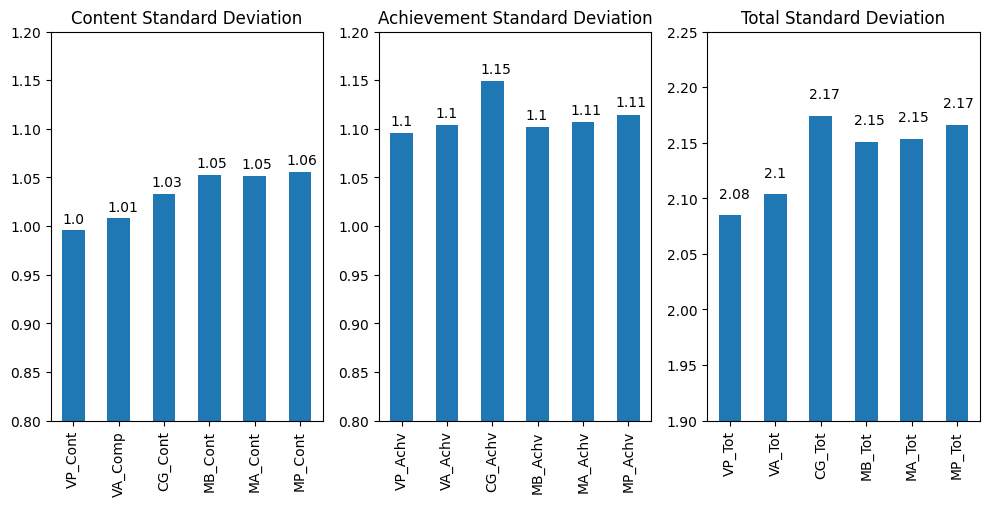

In [173]:
cont_std = df[contCol].std()
achv_std = df[achvCol].std()
tot_std = df[totCol].std()

# Plottiing the standard deviation of the columns using a bar plot
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

cont_std.plot(kind='bar', ax=ax[0])
achv_std.plot(kind='bar', ax=ax[1])
tot_std.plot(kind='bar', ax=ax[2])

# Set the y-axis limits for the plots
ax[0].set_ylim([0.8, 1.2])
ax[1].set_ylim([0.8, 1.2])
ax[2].set_ylim([1.9, 2.25])

# Adding values to the bars
for i in range(3):
    for p in ax[i].patches:
        ax[i].annotate(str(round(p.get_height(), 2)), (p.get_x() * .99, p.get_height() * 1.0075))

plt.tight_layout()

# Adding titles to the plots
ax[0].set_title('Content Standard Deviation')
ax[1].set_title('Achievement Standard Deviation')
ax[2].set_title('Total Standard Deviation')

plt.savefig('../Plots/StandardDeviation.png', dpi=300, bbox_inches='tight')

plt.show()

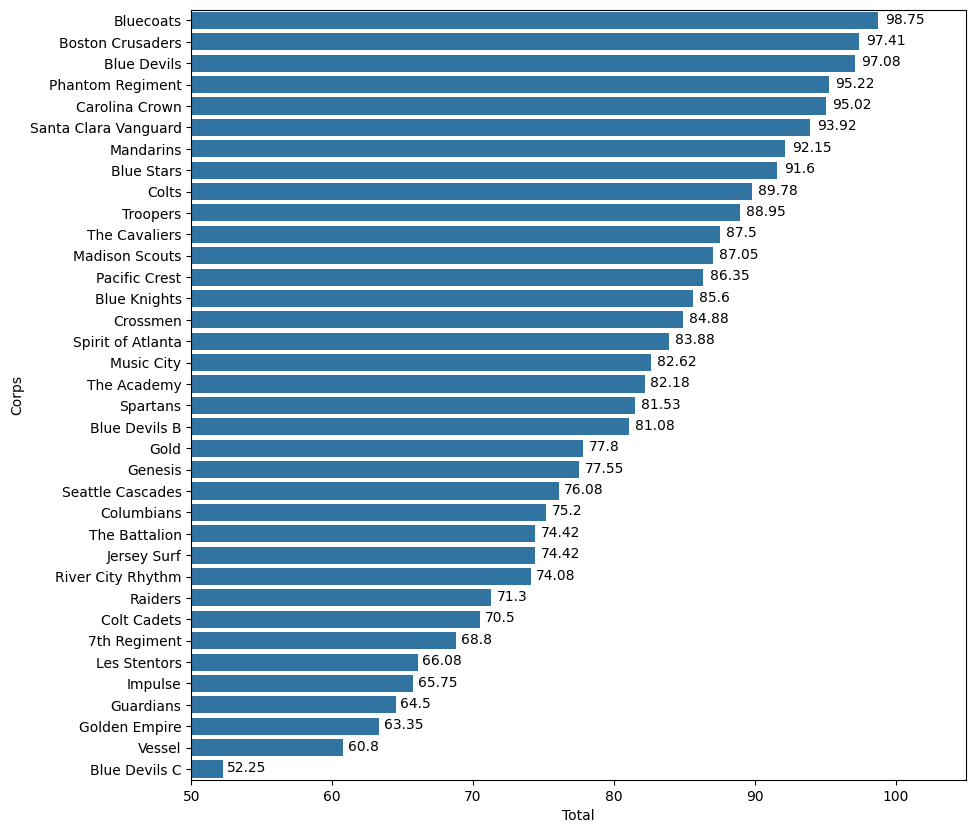

In [178]:
# Ranking corps based on their most recent total scores
# Converting the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Getting the most recent scores
recent_scores = df.loc[df.groupby('Corps')['Date'].idxmax()]

# Sorting the scores
recent_scores = recent_scores.sort_values('Total', ascending=False)

# Plottiing the scores
plt.figure(figsize=(10, 10))
sns.barplot(x='Total', y='Corps', data=recent_scores)
plt.xlim(50,105)

# Adding values to the bars
for p in plt.gca().patches:
    plt.gca().annotate(str(round(p.get_width(), 2)), (p.get_width() * 1.005, p.get_y() + p.get_height() / 1.5))

plt.savefig('../Plots/Ranking.png', dpi=300, bbox_inches='tight')

plt.show()